# IBDA2011 Modul 6 Greedy Technique

*Calvin Institute of Technology. Program Studi IT & Big Data Analytics.*

Disusun oleh: Yozef Tjandra

<br>

**Tujuan Pembelajaran:**

> Mahasiswa mampu menerapkan pola penyelesaian masalah bertipe *Greedy* untuk berbagai konteks permasalahan dengan akurat.

<br>


## Hands On Prim's Algorithm

Berikut merupakan gambar besar cara kerja Algoritma Prim:
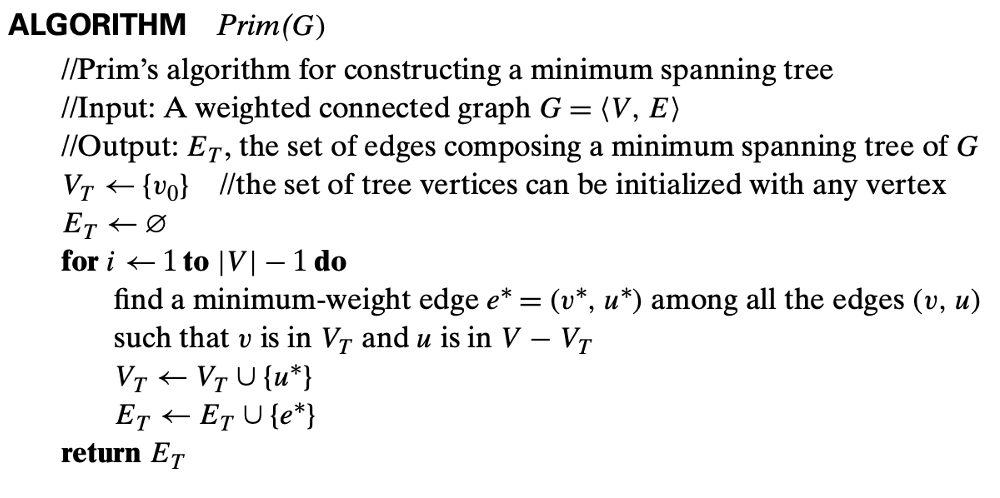

Untuk menguji keberhasilan desain algoritma Prim, kita akan gunakan testcase graf $G$ dengan edge list berikut:

```
edge_list = [
  [0, 1, 9],
  [0, 2, 5],
  [0, 4, 8],
  [1, 3, 7],
  [1, 4, 10],
  [1, 6, 11],
  [2, 3, 7],
  [2, 4, 7],
  [2, 5, 5],
  [3, 4, 4],
  [3, 5, 4],
  [4, 5, 4],
  [5, 7, 13],
  [6, 7, 1]
  ]
```
dengan setiap elementnya berbentuk $[u, v, w]$ berarti bahwa terdapat sisi yang mengaitkan titik $u$ dan $v$ dengan bobot $w$.

Berikut merupakan gambar visualisasi graf:

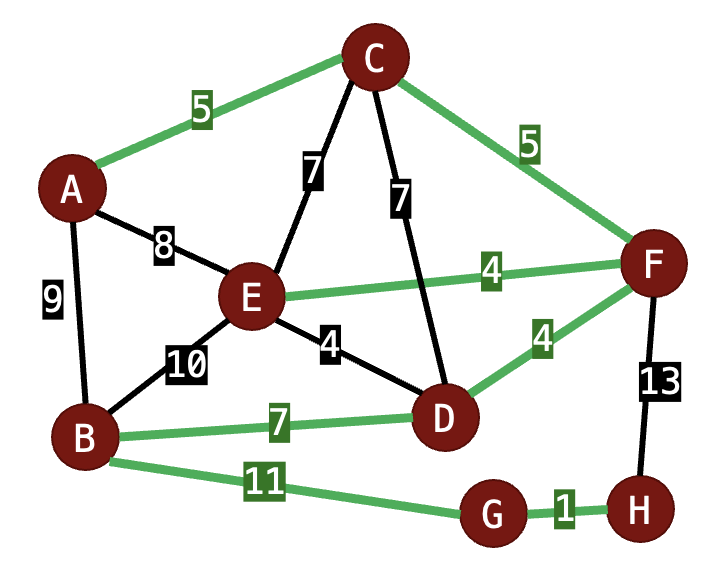

di mana sisi berwarna hijau menggambarkan suatu solusi dari MST dengan total bobot sebesar 37.


### Latihan 1

**Menyetel Stuktur Data Graf**

Pertama, kita perlu untuk bisa mengubah struktur data ```edge_list``` menjadi struktur data yang lebih nyaman untuk keperluan komputasi, misalkan seperti ```adj_list```

In [9]:
edge_list = [
  [0, 1, 9],
  [0, 2, 5],
  [0, 4, 8],
  [1, 3, 7],
  [1, 4, 10],
  [1, 6, 11],
  [2, 3, 7],
  [2, 4, 7],
  [2, 5, 5],
  [3, 4, 4],
  [3, 5, 4],
  [4, 5, 4],
  [5, 7, 13],
  [6, 7, 1]
  ]

def build_adj_list(n, edge_list):
  # n is the number of vertices in the graph
  # edge_list is a list whose elements are in the format of (u, v, w),
  # meaning that there is an edge incident to vertex u and v with weight w.

  # the function return an adjacency list using dictionary
  adj_list = {}
  for i in range(n):
    adj_list[i] = []
  # adj_list {0: [], 1: [], ... , (n-1): []}

  for u, v, w in edge_list:
    adj_list[u].append([v,w])
    adj_list[v].append([u,w])

  return adj_list

adj_list = build_adj_list(8, edge_list)
print(adj_list)
# this should output the following dictionary:
# {
# 0: [[1, 9], [2, 5], [4, 8]],
# 1: [[0, 9], [3, 7], [4, 10], [6, 11]],
# 2: [[0, 5], [3, 7], [4, 7], [5, 5]],
# 3: [[1, 7], [2, 7], [4, 4], [5, 4]],
# 4: [[0, 8], [1, 10], [2, 7], [3, 4], [5, 4]],
# 5: [[2, 5], [3, 4], [4, 4], [7, 13]],
# 6: [[1, 11], [7, 1]],
# 7: [[5, 13], [6, 1]]
# }


{0: [[1, 9], [2, 5], [4, 8]], 1: [[0, 9], [3, 7], [4, 10], [6, 11]], 2: [[0, 5], [3, 7], [4, 7], [5, 5]], 3: [[1, 7], [2, 7], [4, 4], [5, 4]], 4: [[0, 8], [1, 10], [2, 7], [3, 4], [5, 4]], 5: [[2, 5], [3, 4], [4, 4], [7, 13]], 6: [[1, 11], [7, 1]], 7: [[5, 13], [6, 1]]}


### Latihan 2

Selanjutnya, kita perlu membangun fungsi untuk mengimplementasikan bagian dalam kotak pada algoritma Prim.

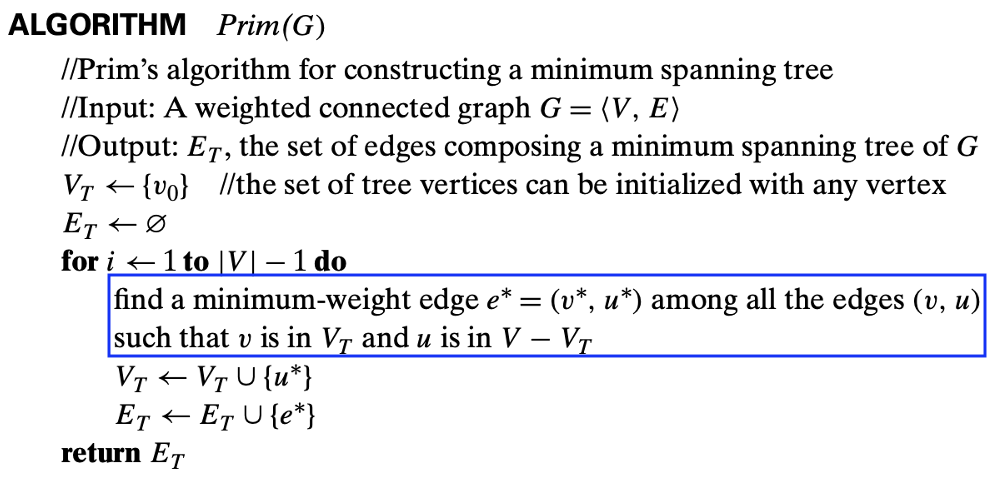

Fungsi ini akan menerima input berupa sebuah subhimpunan titik ```MST_vertex``` yang menyatakan kumpulan titik yang sudah dikunjungi dalam iterasi Prim mengkonstruksi MST. Fungsi tersebut kemudian perlu menemukan sisi dengan bobot terkecil yang menghubungkan dua buah titik $uv$ di mana $u$ ada di dalam ```MST_vertex``` dan $v$ berada di luarnya.

In [17]:
# Suppose that at certain iteration, the algorithm achieves
# the following visited vertices in MST_vertex
MST_vertex = {1, 3, 4, 5, 6, 7}
# meaning that vertex 0 dan 2 are the only unvisited

adj_list = {
  0: [[1, 9], [2, 5], [4, 8]],
  1: [[0, 9], [3, 7], [4, 10], [6, 11]],
  2: [[0, 5], [3, 7], [4, 7], [5, 5]],
  3: [[1, 7], [2, 7], [4, 4], [5, 4]],
  4: [[0, 8], [1, 10], [2, 7], [3, 4], [5, 4]],
  5: [[2, 5], [3, 4], [4, 4], [7, 13]],
  6: [[1, 11], [7, 1]],
  7: [[5, 13], [6, 1]]
  }

def find_min_edge(n, MST_vertex, adj_list):
  # n is the number of vertices in the graph
  # MST_vertex is a set of visited vertices inside the current constructed MST
  # adj_list is a dictionary containing adjacency list of each vertex

  # the function returns an edge between a node inside MST_vertex and another
  # node outside MST_vertex whose weight is minimal
  min_edge = [None, None, float('inf')]
  for vertex in MST_vertex:
    for i in range(len(adj_list[vertex])):
      if adj_list[vertex][i][0] not in MST_vertex:
        if min_edge[2] > adj_list[vertex][i][1]:
          min_edge = [vertex, adj_list[vertex][i][0], adj_list[vertex][i][1]]

  #########################################


  return min_edge

print(find_min_edge(8, MST_vertex, adj_list))
# this should output the edge [5, 2, 5] (or [2, 5, 5])

[5, 2, 5]


Dengan penyelesaian secara naif, seharusnya kompleksitas fungsi ini seburuk-buruknya adalah sebesar $\mathbf{O}(|E|)$.

### Latihan 3

Sekarang kita sudah siap untuk mengimplementasikan keseluruhan Algoritma Prim. Gunakan fungsi-fungsi yang sudah dikerjakan sebelumnya untuk menyusun keseluruhan algoritma Prim.

In [47]:
# Suppose that at certain iteration, the algorithm achieves
# the following visited vertices in MST_vertex
# MST_vertex = {1, 3, 4, 5, 6, 7}
# meaning that vertex 0 dan 2 are the only unvisited

adj_list = {
  0: [[1, 9], [2, 5], [4, 8]],
  1: [[0, 9], [3, 7], [4, 10], [6, 11]],
  2: [[0, 5], [3, 7], [4, 7], [5, 5]],
  3: [[1, 7], [2, 7], [4, 4], [5, 4]],
  4: [[0, 8], [1, 10], [2, 7], [3, 4], [5, 4]],
  5: [[2, 5], [3, 4], [4, 4], [7, 13]],
  6: [[1, 11], [7, 1]],
  7: [[5, 13], [6, 1]]
  }

def find_min_edge(n, MST_vertex, adj_list):
  # n is the number of vertices in the graph
  # MST_vertex is a set of visited vertices inside the current constructed MST
  # adj_list is a dictionary containing adjacency list of each vertex

  # the function returns an edge between a node inside MST_vertex and another
  # node outside MST_vertex whose weight is minimal
  min_edge = [None, None, float('inf')]
  for vertex in MST_vertex:
    for i in range(len(adj_list[vertex])):
      if adj_list[vertex][i][0] not in MST_vertex:
        if min_edge[2] > adj_list[vertex][i][1]:
          min_edge = [vertex, adj_list[vertex][i][0], adj_list[vertex][i][1]]
  #########################################
  return min_edge

# print(find_min_edge(8, MST_vertex, adj_list))
# this should output the edge [5, 2, 5] (or [2, 5, 5])

def Prim(n, adj_list):
  mst_vertex = {0} # start from any vertex
  mst_edge = set()
  mst_cost = 0
  # the function should return the mst_cost and the set of all edges in the MST

  for i in range(1,n):
    min_edge = find_min_edge(i,mst_vertex,adj_list)
    # print(min_edge)
    mst_vertex.add(min_edge[1])
    mst_edge.add((min_edge[0],min_edge[1],min_edge[2]))
    mst_cost += min_edge[2]

          
  #   ############# Your code here ############

  #   #########################################

  return mst_cost, mst_edge

mst_cost, mst_edge = Prim(8, adj_list)
print(mst_cost)
print(mst_edge)

# if printing all the iteration progress:

# Iteration #1: adding the edge (0, 2) with weigth 5.
# Iteration #2: adding the edge (2, 5) with weigth 5.
# Iteration #3: adding the edge (5, 3) with weigth 4.
# Iteration #4: adding the edge (3, 4) with weigth 4.
# Iteration #5: adding the edge (3, 1) with weigth 7.
# Iteration #6: adding the edge (1, 6) with weigth 11.
# Iteration #7: adding the edge (6, 7) with weigth 1.

# The output should be:
# 37
# {(3, 1, 7), (2, 5, 5), (1, 6, 11), (6, 7, 1), (0, 2, 5), (5, 3, 4), (3, 4, 4)}

37
{(3, 1, 7), (2, 5, 5), (1, 6, 11), (6, 7, 1), (0, 2, 5), (5, 3, 4), (3, 4, 4)}


Dengan penyelesaian secara naif, seharusnya kompleksitas fungsi ini seburuk-buruknya adalah sebesar  $\mathbf{O}(|V|.|E|)$ .

### Latihan 4

Gunakan struktur data ```Priority Queue``` untuk meningkatkan efisiensi algoritma menjadi $\mathbf{O}(|V|\log |E|)$.

In [ ]:
# BFS with prio-q

### Dijkstra

In [ ]:
adj_list = {
  0: [[1, 9], [2, 5], [4, 8]],
  1: [[0, 9], [3, 7], [4, 10], [6, 11]],
  2: [[0, 5], [3, 7], [4, 7], [5, 5]],
  3: [[1, 7], [2, 7], [4, 4], [5, 4]],
  4: [[0, 8], [1, 10], [2, 7], [3, 4], [5, 4]],
  5: [[2, 5], [3, 4], [4, 4], [7, 13]],
  6: [[1, 11], [7, 1]],
  7: [[5, 13], [6, 1]]
  }

n = 8
source = 7
visited = [False] * n
dist = [float('inf')] * n
current = source
visited[current] = True
dist[current] = 0

for i in range(n-1):
  ############# Your code here ############

  #########################################

print(dist)

[21, 12, 18, 17, 17, 13, 1, 0]


## Tugas Lab


### Tugas Lab 1: Menyediakan ruang diskusi

Dr. Calvin sering sekali menerima permintaan penggunaan ruang diskusi di perpustakaan secara rutin dari mahasiswa CIT. Sayangnya selama ini, Dr. Calvin sering menolak permintaan tersebut karena hanya terdapat 1 ruang diskusi dan banyak permintaan yang jadwalnya bertabrakan. Untuk mengatasi hal ini, Dr. Calvin memutuskan untuk membuatkan tambahan ruang diskusi dengan harapan tidak ada lagi permintaan penggunaan ruang diskusi yang rutin ini yang tertolak. Dengan diberikan data lengkap $n$ buah permintaan penggunaan ruang yang dilangsungkan secara rutin (dalam bentuk informasi jam mulai dan selesai suatu sesi penggunaan ruang diskusi), tentukan berapa banyak ruangan diskusi **paling sedikit** yang diperlukan untuk dapat mengakomodasi **SELURUH** kebutuhan permintaan tersebut?

**Input:**
*   Sebuah bilangan bulat positif $n$. Diberikan batasan $n\ge 100000$.
*   List ```v``` berukuran $n$ berisi tuple $(s_i,f_i)$, untuk $i=0,1,\dots, n-1$. Artinya, permintaan ke $i$ akan mulai pada waktu $s_i$ dan berakhir pada waktu $f_i$.
* Untuk kemudahan, anggaplah nilai $s_i$ dan $f_i$ adalah bilangan bulat yang berkisar pada interval $[0,1440]$, yang menggambarkan total interval waktu dalam 1 hari dengan satuan menit (1 hari = 1440 menit).

**Tujuan:**
* Mencari bilangan bulat $m$, yang menyatakan banyaknya ruang diskusi paling sedikit yang dibutuhkan agar semua permintaan ruangan dapat dilayani tanpa tabrakan jam.
* Suatu permintaan $(s, f)$ dan $(s',f')$ dikatakan **tidak bertabrakan** jika $s'\ge f$ atau $s\ge f'$. Dengan kata lain permintaan $(s, f)$ selesai tidak melampaui jam mulai $(s', f')$ atau sebaliknya.
* Setelah $m$ yang optimal ditemukan, Anda juga perlu membuatkan algoritma untuk menjadwalkan permintaan yang mana yang perlu dijadwalkan di ruang diskusi yang mana.

**Output:**
* Bilangan bulat $m$.
* Sebuah tabel yang menyatakan hasil penjadwalan yang optimal.

```
Contoh Input:
n = 8
v = [
  (300, 600),
  (500, 750),
  (700, 800),
  (100, 600),
  (900, 1000),
  (100, 500),
  (900, 1400),
  (700, 1200)
]
```

```
Contoh Output:
3 ruang diskusi cukup.

Ruang Diskusi #1: [5, 1, 4]
Ruang Diskusi #2: [0, 7]
Ruang Diskusi #3: [3, 2, 6]
```

Catatan: isian dalam list ruang diskusi merupakan indeks-indeks dari permintaan penggunaan ruang diskusi pada input.


*Penjelasan contoh Input-Output:*

Berikut merupakan visualisasi penjadwalan yang optimal:
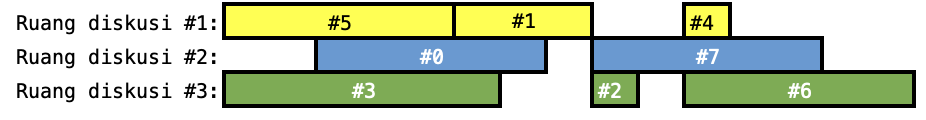

In [2]:
def GreedyScheduling(sorted_v):
    # ambil booking pertama untuk dijadikan patokan
    event_selected = [sorted_v[0]]                  
    saved_index = [sorted_v[0][2]]  # list berisi indexnya saja

    count = 0   
    for i in range(1, len(sorted_v)):
        # cek apakah feasible. Kalau tidak, skip!
        if sorted_v[i][0] < event_selected[count][1]:   # memeriksa apakah jam mulai lebih dari jam selesai event yang telah dipilih
            continue
        else:   # Jika feasible, masukkan
            count += 1
            event_selected.append(sorted_v[i])              
            saved_index.append(sorted_v[i][2])
    
    # membuat sorted_v baru untuk iterasi selanjutnya (sorted_v tanpa event yang telah dipilih)
    count = 0
    new_sorted_v = []
    for i in range (len(sorted_v)):
        if saved_index[count] == sorted_v[i][2]:    # kalau eventnya sudah dipilih, skip
            if count < len(saved_index)-1:
                count += 1
            continue
        else:   # kalau belum, masukkan ke new_sorted_v
            new_sorted_v.append(sorted_v[i])
    
    return new_sorted_v, saved_index

def total_discussion(v):
    if len(v) < 1:
        return []

    # pemberian index (untuk memudahkan penyimpanan)
    for i in range(len(v)):
        v[i] = (v[i][0],v[i][1],i)

    sorted_v = sorted(v, key = lambda x : x[1])     # sort berdasarkan finish
    all_posibilities = []   # tempat menyimpan semua kemungkinan

    # iterasi sampai semua permintaan terakomodasi
    while len(sorted_v) != 0:   
        sorted_v, saved_index = GreedyScheduling(sorted_v)
        all_posibilities.append(saved_index)
    
    return all_posibilities



def main():
    n = 8
    v = [
    (300, 600),
    (500, 750),
    (700, 800),
    (100, 600),
    (900, 1000),
    (100, 500),
    (900, 1400),
    (700, 1200)
    ]

    v = [ 
    (0, 2),  
    (3, 7), 
    (1, 4), 
    (5, 6) 
    ]

    discussion = total_discussion(v)
    print(f'{len(discussion)} ruang diskusi cukup.')

    room = 0
    for data in discussion:
        room += 1
        print(f'Ruang Diskusi #{room}: {data}')
    

if __name__ == '__main__':
    main()

3 ruang diskusi cukup.
Ruang Diskusi #1: [0, 3]
Ruang Diskusi #2: [2]
Ruang Diskusi #3: [1]


In [3]:
### Perbaikan

def GreedyScheduling(sorted_v):
    # ambil booking pertama untuk dijadikan patokan
    event_selected = [sorted_v[0]]                  
    saved_index = [sorted_v[0][2]]  # list berisi indexnya saja

    count = 0   
    for i in range(len(sorted_v)-1,-1,-1):
        # cek apakah feasible. Kalau tidak, skip!
        if sorted_v[i][0] < event_selected[count][1]:   # memeriksa apakah jam mulai lebih dari jam selesai event yang telah dipilih
            continue
        else:   # Jika feasible, masukkan
            count += 1
            event_selected.append(sorted_v[i])              
            saved_index.append(sorted_v[i][2])
    
    # membuat sorted_v baru untuk iterasi selanjutnya (sorted_v tanpa event yang telah dipilih)
    count = 0
    new_sorted_v = []
    for i in range (len(sorted_v)):
        if saved_index[count] == sorted_v[i][2]:    # kalau eventnya sudah dipilih, skip
            if count < len(saved_index)-1:
                count += 1
            continue
        else:   # kalau belum, masukkan ke new_sorted_v
            new_sorted_v.append(sorted_v[i])
    
    return new_sorted_v, saved_index

def total_discussion(v):
    if len(v) < 1:
        return []

    # pemberian index (untuk memudahkan penyimpanan)
    for i in range(len(v)):
        v[i] = (v[i][0],v[i][1],i)

    sorted_v = sorted(v, key = lambda x : x[1])     # sort berdasarkan finish
    all_posibilities = []   # tempat menyimpan semua kemungkinan

    # iterasi sampai semua permintaan terakomodasi
    while len(sorted_v) != 0:   
        sorted_v, saved_index = GreedyScheduling(sorted_v)
        all_posibilities.append(saved_index)
    
    return all_posibilities



def main():
    n = 8
    v = [
    (300, 600),
    (500, 750),
    (700, 800),
    (100, 600),
    (900, 1000),
    (100, 500),
    (900, 1400),
    (700, 1200)
    ]


    discussion = total_discussion(v)
    print(f'{len(discussion)} ruang diskusi cukup.')

    room = 0
    for data in discussion:
        room += 1
        print(f'Ruang Diskusi #{room}: {data}')
    

if __name__ == '__main__':
    main()

2 ruang diskusi cukup.
Ruang Diskusi #1: [0, 1]
Ruang Diskusi #2: [2, 3]


### Tugas Lab 2: Variation on a Theme of Prim

Dalam tugas ini, Anda diminta untuk mengimplementasikan dan memberikan sedikit modifikasi atas algoritma Prim dalam penyelesaian masalah *Minimum Spanning Tree (MST)*.

Dalam tugas ini, kita akan menyelesaikan sebuah variasi dari masalah MST. Ingat kembali bahwa MST dari sebuah graf terhubung tidak selalu bersifat unik, artinya mungkin terdapat banyak pilihan MST yang memiliki total bobot sisi yang sama-sama minimal. Dalam variasi ini, kita akan menyortir kembali berbagai pilihan MST tersebut (jika terdapat lebih dari 1 solusi) dan kita akan memilih MST yang ketinggiannya (levelnya) paling kecil.

Untuk lebih detailnya, misalkan input dari permasalahan ini adalah sebagai berikut:

* $N$ dan $M$, yaitu total banyaknya titik dan sisi pada graf. Titik pada graf dilabeli $\{0,1,\dots ,N-1\}$.
* $M$ buah nilai $u_i, v_i, w_i$ untuk $i=0,1,2,\dots M-1$, yang menyatakan keterangan untuk masing-masing sisi, yaitu bahwa sisi ke-$i$ terkait (*incident*) dengan titik $u_i$ dan $v_i$ serta memiliki bobot $w_i$.
* $R$, sebuah titik pada graf yang akan menjadi akar dari pohon MST.

Dari graf yang diinputkan, akan dipilih MST dengan total bobot yang terkecil. Jika masih terdapat banyak pilihan MST dengan bobot terkecil, maka kita akan mengambil MST dengan ketinggian paling kecil (yaitu panjang lintasan dari titik akar ke titik daun yang paling dalam).

Output yang diharapkan berupa list sisi yang dipilih untuk menjadi MST.

**Contoh Input.**

```
N = 6
M =
edge_list = [
  [0, 1, 8],
  [0, 2, 6],
  [0, 3, 3],
  [1, 3, 3],
  [1, 5, 5],
  [2, 3, 2],
  [2, 4, 2],
  [2, 5, 4],
  [3, 4, 1],
  [3, 5, 2],
  [4, 5, 2]
]
R = 3
```

**Contoh Output.**

```
MST = [
  [0, 3],
  [1, 3],
  [2, 3],
  [4, 3],
  [5, 3]
]
Weight =  11
Root_eccentricity = 1
```

Perhatikan bahwa pada contoh di atas, sebetulnya terdapat 4 pilihan MST berbeda yang sama-sama memiliki total bobot sebesar 11, yaitu

* ```MST1 = [[0, 3], [1, 3], [4, 3], [2, 3], [5, 3]]```
* ```MST2 = [[0, 3], [1, 3], [4, 3], [2, 4], [5, 3]]```
* ```MST3 = [[0, 3], [1, 3], [4, 3], [2, 3], [5, 4]]```
* ```MST4 = [[0, 3], [1, 3], [4, 3], [2, 4], [5, 4]]```

Namun demikian, hanya ```MST1``` yang memiliki eksentrisitas terkecil, yaitu sebesar 1. Oleh sebab itu, output yang diharapkan adalah ```MST1``` dan **bukan** MST-MST yang lain.

*Catatan:* Jika setelah mempertimbangkan eksentrisitas masih terdapat lebih dari 1 pilihan MST, maka MST yang mana saja dapat dioutputkan secara bebas.

**Ketentuan efisiensi waktu:** $\mathcal{O}(N \log N)$.

**Ketentuan efisiensi ruang:** $\mathcal{O}(N+M)$.




In [16]:
from queue import PriorityQueue

# Mengubah edge list menjadi adj list
def build_adj_list(n, edge_list):
    adj_list = {}
    for i in range(n):
        adj_list[i] = []

    for u, v, w in edge_list:
        adj_list[u].append([v, w])
        adj_list[v].append([u, w])

    return adj_list

def prim(N, edge_list, R):
    # validasi
    if len(edge_list) == 0:
        return 0, 0, 0
    
    # Inisialisasi MST vertex: buat dictionary dengan key = titiknya, value = 0
    # Hal ini untuk meminimalkan kompleksitas waktu
    MST_vertex = {}
    for i in range(N):
        MST_vertex[i] = 0

    # Buat list untuk menampung edge
    MST_edge = []
    total_weight = 0    # untuk menghitung total bobot
    max_eccentricity = 0

    # mengubah edge list menjadi adj list
    adj_list = build_adj_list(N,edge_list)

    # Simpan di priority queue dengan urutan prioritas: weight, root_eccentricity, parent, node
    # Simpan terlebih dahulu semua data dengan root = R ke dalam priority Queue
    q = PriorityQueue()
    for node, weight in adj_list[R]:
        q.put((weight, 0, R, node))

    # R sudah pasti dikunjungi karena dia merupakan root
    MST_vertex[R] = 1

    # Looping selama MST edge belum sebanyak N-1 (lakukan BFS tapi dengan priority queue)
    while len(MST_edge) < N-1:
        weight, root_eccentricity, parent, node = q.get()   # pop yang awal

        # Kalau dia feasible
        if MST_vertex[node] == 0:   
            MST_vertex[node] = 1    # Ubah di MST vertex jadi 1 (tanda dia sudah dikunjungi)
            MST_edge.append([parent,node])  
            total_weight += weight
            root_eccentricity += 1
            
            # mengubah max eccentricity ke yang paling besar
            if root_eccentricity > max_eccentricity:
                max_eccentricity = root_eccentricity

            # Masukkan tetangganya ke dalam priority queue
            for new_node, weight in adj_list[node]:
                q.put((weight,root_eccentricity, node, new_node))

    return MST_edge, total_weight, max_eccentricity

def main():
    N = 6
    edge_list = [
        [0, 1, 8],
        [0, 2, 6],
        [0, 3, 3],
        [1, 3, 3],
        [1, 5, 5],
        [2, 3, 2],
        [2, 4, 2],
        [2, 5, 4],
        [3, 4, 1],
        [3, 5, 2],
        [4, 5, 2]
    ]
    R = 3

    MST, weight, root_eccentricity = prim(N,edge_list,R)
    print(f'MST = {MST}')
    print(f'Weight = {weight}')
    print(f'Root_eccentricity = {root_eccentricity}')

if __name__ == '__main__':
    main()

MST = [[3, 4], [3, 2], [3, 5], [3, 0], [3, 1]]
Weight = 11
Root_eccentricity = 1


### Tugas Lab 3: Algoritma Kruskal

Dalam tugas ini, Anda diminta untuk mengimplementasikan algoritma Kruskal dalam penyelesaian masalah *Minimum Spanning Tree (MST)*.

Input dari permasalahan ini adalah sebagai berikut:

* $N$ dan $M$, yaitu total banyaknya titik dan sisi pada graf. Titik pada graf dilabeli $\{0,1,\dots ,N-1\}$.
* $M$ buah nilai $u_i, v_i, w_i$ untuk $i=0,1,2,\dots M-1$, yang menyatakan keterangan untuk masing-masing sisi, yaitu bahwa sisi ke-$i$ terkait (*incident*) dengan titik $u_i$ dan $v_i$ serta memiliki bobot $w_i$.


Dari graf yang diinputkan, outputkan semua sisi dari sebuah MST dengan total bobot yang terkecil **dengan menggunakan algoritma Kruskal**. Jika masih terdapat banyak pilihan MST dengan bobot terkecil, maka Anda dapat mengoutputkan salah satu saja.

Output yang diharapkan berupa list sisi yang dipilih untuk menjadi MST.

**Contoh Input.**

```
N = 6
M =
edge_list = [
  [0, 1, 8],
  [0, 2, 6],
  [0, 3, 3],
  [1, 3, 3],
  [1, 5, 5],
  [2, 3, 2],
  [2, 4, 2],
  [2, 5, 4],
  [3, 4, 1],
  [3, 5, 2],
  [4, 5, 2]
]
R = 3
```

**Contoh Output.**

```
MST = [
  [0, 3],
  [1, 3],
  [2, 3],
  [4, 3],
  [5, 3]
]
Weight =  11
```



**Ketentuan efisiensi waktu:** $\mathcal{O}(NM)$.

**Ketentuan efisiensi ruang:** $\mathcal{O}(N+M)$.




In [ ]:
def Kruskal(N, edge_list):
    MST = []

    # Pakai class agar bisa tahu root dari setiap predecessor
    class Pred:
        def __init__(self,_value):
            self.value = _value
            self.prev = _value

    # buat predecessor list
    node_list = []
    for i in range(N):
        pred = Pred(i)
        node_list.append(pred)

    # sort berdasarkan weight
    sorted_edge_list = sorted(edge_list,key = lambda x : x[2]) 
    k = 0

    MST_cost = 0

    while len(MST) < N-1:
        first_node = sorted_edge_list[k][0]
        second_node = sorted_edge_list[k][1]
        
        first_root = node_list[first_node]
        second_root = node_list[second_node]

        # Cari root masing-masing value
        while first_root.prev != first_root.value:     
            first_root = node_list[first_root.prev]
        
        while second_root.prev != second_root.value:   
            second_root = node_list[second_root.prev]

        print(first_node,second_node)
        for i in node_list:
            print(i.value,i.prev)
        print()

        # Kalau beda root, berarti asiklik
        if first_root.value != second_root.value:

            # Kalau root node pertama masih dirinya sendiri, jadiin dia pred bagi node kedua
            if node_list[first_node].prev == first_node:
                node_list[second_node].prev = node_list[first_node].value

            # Kalau root node kedua masih dirinya sendiri, jadiin dia pred bagi node pertama
            elif node_list[second_node].prev  == second_node:
                node_list[first_node].prev = node_list[second_node].value

            # Kalau dua duanya punya pred yang berbeda dengan dirinya sendiri, maka 1 ngalah.
            else:
                node_list[first_root.value].prev , node_list[first_node].prev = node_list[second_node].value , node_list[first_root.value].value

            MST.append([first_node,second_node])

            # print(MST_cost)
            MST_cost += sorted_edge_list[k][2]   

        k += 1  # iterasi selanjutnya

    return MST, MST_cost

def main():
    N = 6
    edge_list = [
    [0, 1, 8],
    [0, 2, 6],
    [0, 3, 3],
    [1, 3, 3],
    [1, 5, 5],
    [2, 3, 2],
    [2, 4, 2],
    [2, 5, 4],
    [3, 4, 1],
    [3, 5, 2],
    [4, 5, 2]
    ]
    N = 6
    edge_list = [[0,1,5],
                 [0,2,3],
                 [1,2,4],
                 [3,4,2],
                 [3,5,6],
                 [4,5,7],
                 [1,4,100]]
    MST, weight = Kruskal(N,edge_list)
    print(f'MST = {MST}')
    print(f'Weight = {weight}')

if __name__ == '__main__':
    main()

In [23]:
### Perbaikan ###

def Kruskal(N, edge_list):
    MST = []

    # Pakai class agar bisa tahu root dari setiap predecessor
    class Pred:
        def __init__(self,_value):
            self.value = _value
            self.prev = _value

    # buat predecessor list
    node_list = []
    for i in range(N):
        pred = Pred(i)
        node_list.append(pred)

    # sort berdasarkan weight
    sorted_edge_list = sorted(edge_list,key = lambda x : x[2]) 
    k = 0

    MST_cost = 0

    while len(MST) < N-1:
        first_node = sorted_edge_list[k][0]
        second_node = sorted_edge_list[k][1]
        
        first_root = node_list[first_node]
        second_root = node_list[second_node]

        # Cari root masing-masing value
        while first_root.prev != first_root.value:     
            first_root = node_list[first_root.prev]
        
        while second_root.prev != second_root.value:   
            second_root = node_list[second_root.prev]

        print(first_node,second_node)
        for i in node_list:
            print(i.value,i.prev)
        print()

        # Kalau beda root, berarti asiklik
        if first_root.value != second_root.value:

            # Kalau root node pertama masih dirinya sendiri, jadiin dia pred bagi node kedua
            if node_list[first_node].prev == first_node:
                node_list[second_root.value].prev = node_list[first_node].value

            # Kalau root node kedua masih dirinya sendiri, jadiin dia pred bagi node pertama
            elif node_list[second_node].prev  == second_node:
                node_list[first_root.value].prev = node_list[second_node].value

            # Kalau dua duanya punya pred yang berbeda dengan dirinya sendiri, maka 1 ngalah.
            else:
                node_list[first_root.value].prev , node_list[first_node].prev = node_list[second_node].value , node_list[first_root.value].value

            MST.append([first_node,second_node])

            # print(MST_cost)
            MST_cost += sorted_edge_list[k][2]   

        k += 1  # iterasi selanjutnya

    return MST, MST_cost

def main():
    N = 6
    edge_list = [
    [0, 1, 8],
    [0, 2, 6],
    [0, 3, 3],
    [1, 3, 3],
    [1, 5, 5],
    [2, 3, 2],
    [2, 4, 2],
    [2, 5, 4],
    [3, 4, 1],
    [3, 5, 2],
    [4, 5, 2]
    ]
    N = 6
    edge_list = [[0,1,5],
                 [0,2,3],
                 [1,2,4],
                 [3,4,2],
                 [3,5,6],
                 [4,5,7],
                 [1,4,100]]
    MST, weight = Kruskal(N,edge_list)
    print(f'MST = {MST}')
    print(f'Weight = {weight}')

if __name__ == '__main__':
    main()

3 4
0 0
1 1
2 2
3 3
4 4
5 5

0 2
0 0
1 1
2 2
3 3
4 3
5 5

1 2
0 0
1 1
2 0
3 3
4 3
5 5

0 1
0 1
1 1
2 0
3 3
4 3
5 5

3 5
0 1
1 1
2 0
3 3
4 3
5 5

4 5
0 1
1 1
2 0
3 3
4 3
5 3

1 4
0 1
1 1
2 0
3 3
4 3
5 3

MST = [[3, 4], [0, 2], [1, 2], [3, 5], [1, 4]]
Weight = 115


### Tugas Lab 4: Huffman Coding

Dalam tugas ini, Anda diminta untuk mengimplementasikan skema pengompresan data berbentuk teks.

Input yang diberikan adalah sebuah string dengan panjang sembarang. Misalkan panjang string input tersebut adalah $N$ dan banyaknya karakter yang unik dari string tersebut adalah $M$.

Output yang diharapkan adalah sebagai berikut:
* Bentuk biner dari keseluruhan string input.
* Tabel frekuensi kemunculan karakter string input
* Dictionary terjemahan setiap karakter unik dari string input ke bentuk Huffman Codingnya.
* Bentuk biner hasil encoding string input dengan menggunakan Huffman Coding yang dibangun dari analisis frekuensi kemunculan karakter.
* Analisis compress ratio hasil encoding.

Berikut merupakan beberapa subalgoritma yang perlu Anda implementasikan sesuai output yang diharapkan di atas:

1. Mengubah string menjadi bentuk biner ASCII.
2. Mengkonstruksi tabel frekuensi kemunculan karakter.
3. Mengkonstruksi Huffman Tree dan Huffman Encoding.
4. Mengimplementasikan encoding string input berdasarkan hasil Huffman Coding/Huffman Tree yang sudah dikonstruksi.
5. Menghitung Compress Ratio dari hasil Huffman Coding.

**Contoh.** Misalkan kita memiliki input string sebagai berikut.
```
text = "Lead, kindly Light, amid the encircling gloom, Lead thou me on; The night is dark, and I am far from home, Lead thou me on. Keep thou my feet; I do not ask to see The distant scene; one step enough for me."
```

Maka output yang diharapkan adalah kira-kira sebagai berikut:
```
1. ASCII Encoding:
01001100011001010110000101100100001011000010000001101011011010010110111001100100011011000111100100100000010011000110100101100111011010000111010000101100001000000110000101101101011010010110010000100000011101000110100001100101001000000110010101101110011000110110100101110010011000110110110001101001011011100110011100100000011001110110110001101111011011110110110100101100001000000100110001100101011000010110010000100000011101000110100001101111011101010010000001101101011001010010000001101111011011100011101100100000010101000110100001100101001000000110111001101001011001110110100001110100001000000110100101110011001000000110010001100001011100100110101100101100001000000110000101101110011001000010000001001001001000000110000101101101001000000110011001100001011100100010000001100110011100100110111101101101001000000110100001101111011011010110010100101100001000000100110001100101011000010110010000100000011101000110100001101111011101010010000001101101011001010010000001101111011011100010111000100000010010110110010101100101011100000010000001110100011010000110111101110101001000000110110101111001001000000110011001100101011001010111010000111011001000000100100100100000011001000110111100100000011011100110111101110100001000000110000101110011011010110010000001110100011011110010000001110011011001010110010100100000010101000110100001100101001000000110010001101001011100110111010001100001011011100111010000100000011100110110001101100101011011100110010100111011001000000110111101101110011001010010000001110011011101000110010101110000001000000110010101101110011011110111010101100111011010000010000001100110011011110111001000100000011011010110010100101110
length : 1640

2. Frequency Analysis:
L	: 0.01951219512195122
e	: 0.1073170731707317
a	: 0.04878048780487805
d	: 0.04390243902439024
,	: 0.024390243902439025
 	: 0.2048780487804878
k	: 0.014634146341463415
i	: 0.03902439024390244
n	: 0.05853658536585366
l	: 0.014634146341463415
y	: 0.00975609756097561
g	: 0.024390243902439025
h	: 0.04878048780487805
t	: 0.05853658536585366
m	: 0.04390243902439024
c	: 0.014634146341463415
r	: 0.024390243902439025
o	: 0.07317073170731707
u	: 0.01951219512195122
;	: 0.014634146341463415
T	: 0.00975609756097561
s	: 0.02926829268292683
I	: 0.00975609756097561
f	: 0.01951219512195122
.	: 0.00975609756097561
K	: 0.004878048780487805
p	: 0.00975609756097561

3. Huffman Coding Dictionary:
L	: 110001
e	: 011
a	: 11110
d	: 11100
,	: 01000
 	: 00
k	: 010111
i	: 11001
n	: 1000
l	: 101010
y	: 0101101
g	: 01001
h	: 11111
t	: 1001
m	: 11101
c	: 101011
r	: 01010
o	: 1011
u	: 110100
;	: 110000
T	: 1101100
s	: 10100
I	: 1101101
f	: 110101
.	: 1101110
K	: 0101100
p	: 1101111

4. Huffman Encoding:
1100010111111011100010000001011111001100011100101010010110100110001110010100111111100101000001111011101110011110000100111111011000111000101011110010101010101110101011001100001001000100110101010111011111010100000110001011111101110000100111111101111010000111010110010111000110000001101100111110110010001100101001111111001001100110100001110011110010100101110100000111101000111000011011010011110111010011010111110010100011010101010101111101001111110111110101101000001100010111111011100001001111111011110100001110101100101110001101110000101100011011110111100100111111101111010000111010101101001101010110111001110000001101101001110010110010001011100100111101010001011100100110110010100011011001101100111110110011100110011010010011111010001001001010010101101110000111100000010111000011001010010010111101111000111000101111010001001111110011010110110101000111010111101110
length: 862

5. Compress Ratio:
fixed-length codeword number of bits: 5
huffman coding average codeword number of bits: 4.204878048780489

Compress ratio : 15.90%
```

**Ketentuan efisiensi waktu:** $\mathcal{O}(N + M^2)$.

**Ketentuan efisiensi ruang:** $\mathcal{O}(N+M)$.

Tugas tantangan: Implementasikan algoritma dengan kompleksitas $\mathcal{O}(N + M\log M)$.

In [1]:
import math 

class Node:
    def __init__(self, _weight, _symbol, _left, _right):
        self.weight = _weight
        self.symbol = _symbol
        self.left_child = _left
        self.right_child = _right
        self.code = ''

    def change_weight(self):
        self.weight = float('inf')

def text_to_binary(txt):
    result = ''
    for char in txt :
        # Mengubah alphabet menjadi ASCII biner dengan panjang 8-bit
        binary_char = format(ord(char), '08b')
        # Masukan representasi biner kedalam result
        result += binary_char
    return result

def freq_analy(txt):
    freq_table = {}
    total_char = len(txt)

    # Meng-loop sepanjang txt
    for char in txt:
        # Mengupdate total count setiap alphabet dalam freq_table
        if char in freq_table:
            freq_table[char] += 1
        else: 
            freq_table[char] = 1

    for char in freq_table:
        count = freq_table[char]
        # Menghitung rata-rata freq sebuah alphabet
        freq = count / total_char
        freq_table[char] = freq
    return freq_table

def huffman_tree(freq_table):
    # Validasi
    if len(freq_table) <1:
        return {None:None}
    elif len(freq_table) == 1:
        text = list(freq_table.keys())
        return {text[0] : '0'}

    priority_queue = []
    temp = sorted(freq_table.items(), key = lambda item:item[1])    # sort berdasarkan frekuensi masing" karakter

    # memasukkan node ke dalam priority queue
    for data in temp:
        priority_queue.append(Node(data[1], data[0], None, None))
    
    N = len(priority_queue) - 1    

    # lakukan looping untuk membangun tree
    for i in range(N):  
        append_index = 0

        # ambil 2 anak yang memiliki nilai terkecil
        left = priority_queue.pop(0)
        right = priority_queue.pop(0)
        new_node = Node((left.weight + right.weight), None, left, right)    # buat node baru
        
        # Letakkan node baru ke dalam priority queue
        for i in range(len(priority_queue)):
            if priority_queue[i].weight <= new_node.weight:
                append_index += 1
        
        priority_queue.insert(append_index,new_node)
    
    tree = [priority_queue[0]]
    huffman_coding_dict = {}

    # Buat huffman coding dictionary dengan periksa masing" anak dari node dalam list
    for i in range(2*N + 1):
        left = tree[i].left_child

        if left != None:    # jika left != None, berarti punya anak kiri
            left.code = tree[i].code + '0'  # tambahin kode 0
            tree.append(left)

            if left.symbol != None: # kalau ada simbolnya, masukin ke huffman coding dict
                huffman_coding_dict[left.symbol] = left.code

        right = tree[i].right_child

        if right != None:
            right.code = tree[i].code + '1'
            tree.append(right)

            if right.symbol != None:
                huffman_coding_dict[right.symbol] = right.code

    return huffman_coding_dict

def encoding(text, huffman_dict):
    # Mengubah text menjadi biner dengan menggunakan huffman dict
    binary = ''
    for char in text:
        binary += huffman_dict[char]
    return binary    

def compress(freq_table, huffman):
    # validasi
    if len(freq_table) == 0:      
        return 0, 0, 0
    
    # menghitung fixed length
    if len(freq_table) == 1:    # validasi
        fixed_length = 1
    else:
        fixed_length = math.ceil(math.log2(len(freq_table)))

    # menghitung ave length
    ave_length = 0
    for char in huffman:
        ave_length += freq_table[char] * (len(huffman[char]))

    # menghitung compress ratio
    compress_ratio = (fixed_length-ave_length) / fixed_length * 100

    return fixed_length, ave_length, compress_ratio

def main():
    text = "Lead, kindly Light, amid the encircling gloom, Lead thou me on; The night is dark, and I am far from home, Lead thou me on. Keep thou my feet; I do not ask to see The distant scene; one step enough for me."

    # ASCII Encoding
    ascii_encoding = text_to_binary(text)
    print('1. ASCII Encoding:')
    print(ascii_encoding)
    print(f'length : {len(ascii_encoding)}')
    print()

    # Frequency Analysis
    freq_table = freq_analy(text)
    print('2. Frequency Analysis:')
    for char in freq_table:
        print(f"{char}      : {freq_table[char]}")
    print()

    # Huffman Coding Dictionary:
    huffman_dict = huffman_tree(freq_table)
    print('3. Huffman Coding Dictionary')
    for char in huffman_dict:
        print(f"{char}      : {huffman_dict[char]}")
    print()

    # Huffman Encoding:
    huffman_encoding = encoding(text, huffman_dict)
    print('4. Huffman Encoding:')
    print(huffman_encoding)
    print(f'length : {len(huffman_encoding)}')
    print()

    # Compress Ratio:
    fixed_length, ave_length, compress_ratio = compress(freq_table, huffman_dict)
    print('5. Compress Ratio:')
    print(f'fixed-length codeword number of bits: {fixed_length}')
    print(f'huffman coding average codeword number of bits: {ave_length}')
    print(f'Compress ratio : {compress_ratio}%')

if __name__ == '__main__':
    main()

1. ASCII Encoding:
010011000110010101100001011001000010110000100000011010110110100101101110011001000110110001111001001000000100110001101001011001110110100001110100001011000010000001100001011011010110100101100100001000000111010001101000011001010010000001100101011011100110001101101001011100100110001101101100011010010110111001100111001000000110011101101100011011110110111101101101001011000010000001001100011001010110000101100100001000000111010001101000011011110111010100100000011011010110010100100000011011110110111000111011001000000101010001101000011001010010000001101110011010010110011101101000011101000010000001101001011100110010000001100100011000010111001001101011001011000010000001100001011011100110010000100000010010010010000001100001011011010010000001100110011000010111001000100000011001100111001001101111011011010010000001101000011011110110110101100101001011000010000001001100011001010110000101100100001000000111010001101000011011110111010100100000011011010110010100100000011011110110111000101

In [2]:
# TANTANGAN

import math 

class Node:
    def __init__(self, _weight, _symbol, _left, _right):
        self.weight = _weight
        self.symbol = _symbol
        self.left_child = _left
        self.right_child = _right
        self.code = ''

    def change_weight(self):
        self.weight = float('inf')

def BottomUpParentDominance(H,i):
    # Tambal
    if i > len(H)-1 or i <1:
        return "Input tidak valid"
    
    # Basis
    if i == 1:
        return H
    
    child = H[i]        # node childnya
    par = H[i//2]       # node parentnya
    if par.weight > child.weight:     # cek apakah parental dominance
        H[i//2] = child     # Kalau tidak, tuker!
        H[i] = par
        BottomUpParentDominance(H,i//2)
    return H 

def TopDownParentDominance(H,i):
    # Tambal
    if i > len(H)-1 or i < 1:
        return "Input tidak valid"
    
    # kalau udah ga punya anak
    if 2*i > len(H)-1:
        return H

    # Ambil index anak anaknya
    LC_index = 2*i
    RC_index = 2*i+1

    # Ambil value anak kirinya
    LC = H[LC_index]

    # Kalau ada anak kanan:
    if RC_index <= len(H)-1:
        RC = H[RC_index]

        # Kalau ga parental dominance:
        if H[i].weight > LC.weight or H[i].weight > RC.weight:
            MinimumChild = min(LC.weight,RC.weight)  # Cari minimum child

            # Langkah SWAP
            if MinimumChild == LC.weight:
                H[LC_index] = H[i]
                H[i] = LC
                MinimumChild_index = LC_index
            else:
                H[RC_index] = H[i]
                H[i] = RC
                MinimumChild_index = RC_index
            TopDownParentDominance(H,MinimumChild_index)
    # Kalau ga punya anak kanan
    else:
        # Bandingin sama anak kiri aja, kalau ga parental dominance, swap
        if H[i].weight > LC.weight:
            H[LC_index] = H[i]
            H[i] = LC
            MinimumChild_index = LC_index
            TopDownParentDominance(H,MinimumChild_index)
    return H

def Insert(H,v):
    # Masukkan nilai v ke list paling belakang
    H.append(v)
    new_val_index = len(H)-1
    # Lakukan bottom up dari index angka yang baru dimasukkan
    BottomUpParentDominance(H,new_val_index)
    return H

def Delete(H,i):
    # Tambal
    if i > len(H)-1 or i < 1:
        return "Input tidak valid"
    
    # Swap nilai dari indeks yang ingin di-delete dengan nilai dari indeks terakhir
    i_val = H[i]
    last_val = H[len(H)-1]

    H[i] , H[len(H)-1] = last_val , i_val

    # Hapus daun terakhir
    H.pop(-1)
    # Lakukan Top Down dari indeks yang baru saja ditukar dengan indeks terakhir
    TopDownParentDominance(H,i)
    return H

def text_to_binary(txt):
    result = ''
    for char in txt :
        # Mengubah alphabet menjadi ASCII biner dengan panjang 8-bit
        binary_char = format(ord(char), '08b')
        # Masukan representasi biner kedalam result
        result += binary_char
    return result

def freq_analy(txt):
    freq_table = {}
    total_char = len(txt)

    # Meng-loop sepanjang txt
    for char in txt:
        # Mengupdate total count setiap alphabet dalam freq_table
        if char in freq_table:
            freq_table[char] += 1
        else: 
            freq_table[char] = 1

    for char in freq_table:
        count = freq_table[char]
        # Menghitung rata-rata freq sebuah alphabet
        freq = count / total_char
        freq_table[char] = freq
    return freq_table

def huffman_tree(freq_table):
    # Validasi
    if len(freq_table) <1:
        return {None:None}
    elif len(freq_table) == 1:
        text = list(freq_table.keys())
        return {text[0] : '0'}
    
    priority_queue = [None]
    temp = sorted(freq_table.items(), key = lambda item:item[1])

    # memasukkan node ke dalam priority queue
    for data in temp:
        priority_queue.append(Node(data[1], data[0], None, None))

    N = len(priority_queue) - 2

    # lakukan looping untuk membangun tree
    for i in range(N):
        # Ambil 2 anak yang memiliki nilai terkecil
        left = priority_queue[1]
        Delete(priority_queue, 1)   # lakukan delete agar indeks 1 tetap yang freq nya paling kecil
        right = priority_queue[1]
        Delete(priority_queue, 1)

        # Letakkan node baru ke dalam priority queue
        Insert(priority_queue, Node((left.weight + right.weight),None,left,right))

    tree = [None, priority_queue[1]]
    huffman_coding_dict = {}

    # Buat huffman coding dictionary dengan periksa masing" anak dari node dalam list
    for i in range(1,N+N+1):
        left = tree[i].left_child
        if left != None:    # jika left != None, berarti punya anak kiri
            left.code = tree[i].code + '0'  # tambahin kode 0
            tree.append(left)
            if left.symbol != None:     # kalau ada simbolnya, masukin ke huffman coding dict
                huffman_coding_dict[left.symbol] = left.code
        
        right = tree[i].right_child
        if right != None:   
            right.code = tree[i].code + '1'
            tree.append(right)
            if right.symbol != None:
                huffman_coding_dict[right.symbol] = right.code

    return huffman_coding_dict

def encoding(text, huffman_dict):
    # Mengubah text menjadi biner dengan menggunakan huffman dict
    binary = ''
    for char in text:
        binary += huffman_dict[char]
    return binary    

def compress(freq_table, huffman):
    # validasi
    if len(freq_table) == 0:      
        return 0, 0, 0
    
    # menghitung fixed length
    if len(freq_table) == 1:    # validasi
        fixed_length = 1
    else:
        fixed_length = math.ceil(math.log2(len(freq_table)))

    # menghitung ave length
    ave_length = 0
    for char in huffman:
        ave_length += freq_table[char] * (len(huffman[char]))

    # menghitung compress ratio
    compress_ratio = (fixed_length-ave_length) / fixed_length * 100

    return fixed_length, ave_length, compress_ratio

def main():
    text = "Lead, kindly Light, amid the encircling gloom, Lead thou me on; The night is dark, and I am far from home, Lead thou me on. Keep thou my feet; I do not ask to see The distant scene; one step enough for me."

    # ASCII Encoding
    ascii_encoding = text_to_binary(text)
    print('1. ASCII Encoding:')
    print(ascii_encoding)
    print(f'length : {len(ascii_encoding)}')
    print()

    # Frequency Analysis
    freq_table = freq_analy(text)
    print('2. Frequency Analysis:')
    for char in freq_table:
        print(f"{char}      : {freq_table[char]}")
    print()

    # Huffman Coding Dictionary:
    huffman_dict = huffman_tree(freq_table)
    print('3. Huffman Coding Dictionary')
    for char in huffman_dict:
        print(f"{char}      : {huffman_dict[char]}")
    print()

    # Huffman Encoding:
    huffman_encoding = encoding(text, huffman_dict)
    print('4. Huffman Encoding:')
    print(huffman_encoding)
    print(len(huffman_encoding))
    print()

    # Compress Ratio:
    fixed_length, ave_length, compress_ratio = compress(freq_table, huffman_dict)
    print('5. Compress Ratio:')
    print(f'fixed-length codeword number of bits: {fixed_length}')
    print(f'huffman coding average codeword number of bits: {ave_length}')
    print(f'Compress ratio : {compress_ratio}%')

if __name__ == '__main__':
    main()

1. ASCII Encoding:
010011000110010101100001011001000010110000100000011010110110100101101110011001000110110001111001001000000100110001101001011001110110100001110100001011000010000001100001011011010110100101100100001000000111010001101000011001010010000001100101011011100110001101101001011100100110001101101100011010010110111001100111001000000110011101101100011011110110111101101101001011000010000001001100011001010110000101100100001000000111010001101000011011110111010100100000011011010110010100100000011011110110111000111011001000000101010001101000011001010010000001101110011010010110011101101000011101000010000001101001011100110010000001100100011000010111001001101011001011000010000001100001011011100110010000100000010010010010000001100001011011010010000001100110011000010111001000100000011001100111001001101111011011010010000001101000011011110110110101100101001011000010000001001100011001010110000101100100001000000111010001101000011011110111010100100000011011010110010100100000011011110110111000101